# MNIST dataset classification Using K-Nearest Neighborhood (KNN) algorithm
Samar Amini,
May 2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix

### Reading data

In [2]:
train1 = pd.read_csv('../Data/train_sample.csv')
test1 = pd.read_csv('../Data/test_sample.csv')

train2 = pd.read_csv('../Data/train_sample_2.csv')
test2 = pd.read_csv('../Data/test_sample_2.csv')

### Analysing data

In [3]:
train1.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
train2.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
print('train1: ', train1.shape)
print('test1: ', test1.shape)

print('train2: ', train2.shape)
print('test2: ', test2.shape)

train1:  (5000, 785)
test1:  (1000, 785)
train2:  (5000, 782)
test2:  (1000, 785)


In [67]:
print('min & max label values for train1: ', train1.label.min(),' , ',  train1.label.max())
print('min & max label values for test1: ', test1.label.min(),' , ',  test1.label.max())
print('----------------')
print('min & max label values for train2:: ', train2.label.min(),' , ',  train2.label.max())
print('min & max label values for test2: ', test2.label.min(),' , ',  test2.label.max())


min & max label values for train1:  0  ,  9
min & max label values for test1:  0  ,  9
----------------
min & max label values for train2::  0  ,  9
min & max label values for test2:  0  ,  9


<AxesSubplot:>

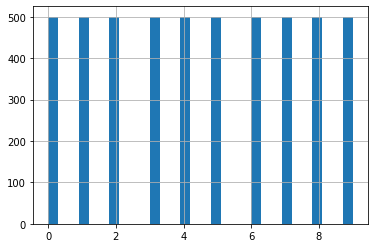

In [11]:
train1.label.hist(bins=30)

<AxesSubplot:>

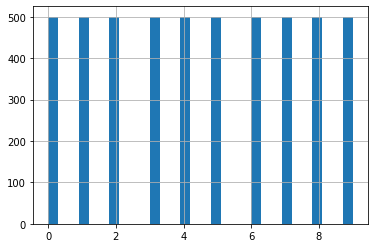

In [33]:
train1.label.hist(bins=30)

### Analysera de två olika dataseten och välj det som du anser har bäst kvalite
> I chose to continue with the "train_sample.csv" and "test_sample.csv" datasets, loaded here as "train1 and test1".</br>
Both datasets look similar unless the other one has less attributes (coloumns) in the train set than the test set.

### Hur många klasser finns det?
> There are 10 classess in the dataset, which are listed in the coloumn "label". These Classes are numbers from 0 to 9.



### Rita ut minst en variant av varje siffra som en bild på siffran.

In [3]:
## plitting the target and attributes into y and x variables.

x_train1 = train1.drop(['label'], axis=1).values
y_train1 = train1.label.values

x_test1 = test1.drop(['label'], axis=1).values
y_test1 = test1.label.values

In [5]:
## reshaping xtrain to 3D array

Xtrain = np.reshape(x_train1,(5000,28, 28))
ytrain = y_train1
Xtrain.shape

(5000, 28, 28)

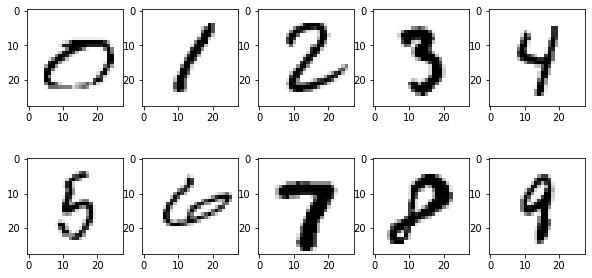

In [6]:
## plotting the images

fig2, axes = plt.subplots(2,5,figsize=(10,5))
axe = axes.flatten()

for i in range(10):
    im_idx = np.argwhere(ytrain == i)[0]
    
    plottable_image = np.reshape(Xtrain[im_idx], (28, 28))
    axe[i].imshow(plottable_image, cmap='gray_r')

plt.show()

### Training a KNN
Vad har du för värde på k? Testa med olika värden
> I tried with K values from 3 to 99 but only the odd numbers. </br>

In [7]:
neighbors = []
for i in range(3,100,2):
    neighbors.append(i)
    

In [8]:
testscore = []
for kk in neighbors:
    KNN = KNeighborsClassifier(n_neighbors = kk)
    KNN.fit(x_train1,y_train1)
    testscore.append(KNN.score(x_test1,y_test1))
    print("K: ", kk, ", testscore: ", KNN.score(x_test1,y_test1))
       

K:  3 , testscore:  0.945
K:  5 , testscore:  0.945
K:  7 , testscore:  0.936
K:  9 , testscore:  0.934
K:  11 , testscore:  0.929
K:  13 , testscore:  0.923
K:  15 , testscore:  0.925
K:  17 , testscore:  0.924
K:  19 , testscore:  0.92
K:  21 , testscore:  0.925
K:  23 , testscore:  0.92
K:  25 , testscore:  0.916
K:  27 , testscore:  0.914
K:  29 , testscore:  0.919
K:  31 , testscore:  0.916
K:  33 , testscore:  0.914
K:  35 , testscore:  0.912
K:  37 , testscore:  0.911
K:  39 , testscore:  0.912
K:  41 , testscore:  0.909
K:  43 , testscore:  0.909
K:  45 , testscore:  0.904
K:  47 , testscore:  0.903
K:  49 , testscore:  0.901
K:  51 , testscore:  0.9
K:  53 , testscore:  0.896
K:  55 , testscore:  0.895
K:  57 , testscore:  0.897
K:  59 , testscore:  0.893
K:  61 , testscore:  0.893
K:  63 , testscore:  0.892
K:  65 , testscore:  0.888
K:  67 , testscore:  0.886
K:  69 , testscore:  0.885
K:  71 , testscore:  0.884
K:  73 , testscore:  0.883
K:  75 , testscore:  0.882
K:  77 , 

### Vad får modellen för testscore?
> Test-score varies between 0.945 to 0.872 as K increases from 3 to 99.

Text(0.5, 1.0, 'KNN Modeling')

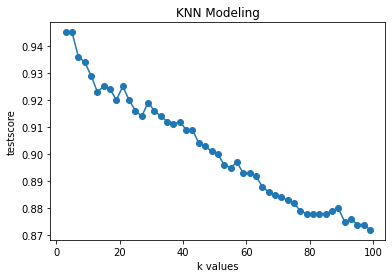

In [9]:
## plotting testscore variations with K

plt.plot(neighbors,testscore,'-o')
plt.xlabel('k values')
plt.ylabel('testscore')
plt.title('KNN Modeling')


In [11]:
## finding the max testscore

print('Max testscore:' ,max(testscore))
max_index = testscore.index(max(testscore))
#print(max_index)
print('at K=',neighbors[max_index])

Max testscore: 0.945
at K= 3


### Skapa en confusion matrix för att se hur modellen klassificerar

In [12]:
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(x_train1,y_train1)
y_pred = KNN.predict(x_test1)

cm = confusion_matrix(y_test1, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[ 97   0   0   0   0   0   3   0   0   0]
 [  0 100   0   0   0   0   0   0   0   0]
 [  0   3  95   0   0   0   0   1   0   1]
 [  1   0   1  92   0   3   0   1   1   1]
 [  0   2   0   0  93   0   0   1   0   4]
 [  0   2   0   2   0  94   2   0   0   0]
 [  0   0   0   0   0   3  97   0   0   0]
 [  0   4   0   0   0   0   0  94   0   2]
 [  0   1   1   3   0   5   0   1  89   0]
 [  0   0   0   0   2   0   0   4   0  94]]


C:\Users\samar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


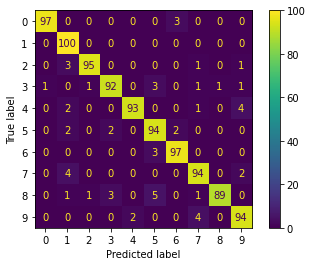

In [13]:
plot_confusion_matrix(KNN, x_test1, y_test1)
plt.show()

> According to the confusion matrix, the model works best for class '1' and worst for class '8'

### Skriv en egen funktion så att de k närmsta grannarna ritas ut för en prediktion.

In [115]:
print(KNN.predict_proba(x_test1[566,:].reshape(1,784)) )

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [15]:
print(KNN.kneighbors(x_test1[566,:].reshape(1,784) ))
print()
print('>> The first array shows distances, and second array shows index of the nearest neighbor points')

(array([[1274.0698568 , 1596.4285139 , 1605.76492676, 1640.94728739,
        1661.66693414]]), array([[2593, 2697, 2646, 2830, 2975]], dtype=int64))

>> The first array shows distances, and second array shows index of the nearest neighbor points
